# Feature Engineering I

**This notebook has the objective to acquire all of the raw play-by-play data for the 2015/16 season all the way to the 2019/20 season (inclusive), with the last season being the test set. Note that this tidied data will be useful for the baseline models, but we will be creating more features that will require the full raw data in the Feature Engineering II section.**

We ran the file "nhl_data_downloader" twice, once to save our training dataset (2015-16 to 2018-19 seasons) in "nhl_data_train", and once to set aside all of the 2019/20 data as our final test set in the folder "nhl_data"test". 

Here, we will work with the file "tidy_data.py" for the first part of feature engineering.


In [1]:
import pandas as pd
import numpy as np
import json
import os as os
import seaborn as sns
import matplotlib.pyplot as plt
from tidy_data import *

## Tidying the data

Using our training dataset, we created a tidied dataset for each SHOT/GOAL event, with the following columns:

- 'distance_to_goal' (distance of the shot from the net)
- 'shooting_angle' (angle from which the shot was taken)
- 'isGoal' (0 or 1)
- 'isEmptyNet' (0 or 1; we will assume NaNs as 0)


We approximated the net as a single point (i.e. we didn't consider the width of the net when computing the distance or angle). 

reference for shot angle: http://hockeyanalytics.com/Research_files/SQ-RS0910-Krzywicki.pdf


In [ ]:
# folder of the raw training dataset
folder_train = 'nhl_data_train'
folder_test = 'nhl_data_test'

run_tidy_data(folder_train)

In [3]:
# folder of the raw training dataset
folder_train = 'nhl_data_train'
folder_test = 'nhl_data_test'

fileList = [f for f in os.listdir(folder_train)]
all_sng_df = pd.DataFrame()
for file in fileList:
    if file.endswith('.json'):
        # get all events, then pivot for shots and goals
        tmp_df = pivot_for_shots_and_goals(create_event_dataframe(f'{folder_train}/{file}'))

        # stacking all dataframes
        all_sng_df = pd.concat([all_sng_df, tmp_df])



# sort by GameID
asngsorted_df = all_sng_df.sort_values(by=['GameID', 'Event', 'Period', 'GameTime'])

# Calculates the distance between a shot/goal and the net, rounded to the nearest number
# the column 'distance_to_goal' is added to the df
asngsorted_df = add_distance(asngsorted_df)

# Calculates the angle between a shot/goal and the net
# the column 'shooting_angle' is added to the df
asngsorted_df = add_angle(asngsorted_df)

# save to a csv file
asngsorted_df.to_csv('tidy_data.csv')

2015020577
2018021098
2016020087
2015020127
2018021132
2017020787
2019020023
2018020373
2016020984
2018020689
2019020473
2015020824
2018020723
2019020189
2017021196
2019020166
2017021179
2018020236
2016021229
2015021223
2019020536
2015020961
2018020666
2018030236
2017020292
2017020768
2019020865
2016020438
2015020432
2016020592
2015020598
2017020338
2015020062
2018021077
2016020068
2017020912
2016021100
2017021250
2016020341
2017020011
2016020711
2017020441
2016020204
2017020154
2016020654
2018020959
2017020504
2017020857
2017030154
2016021045
2019020424
2016020879
2015020873
2018020774
2019020074
2018020324
2016020480
2015020170
2018021165
2018030324
2017020380
2015020520
2015020035
2018021020
2017020695
2019020832
2015020465
2016020195
2019020561
2015020936
2018020631
2017021084
2019020131
2018020261
2016020896
2016020746
2017020416
2016020316
2017020046
2018020148
2016021157
2019020218
2017021207
2018020518
2017020945
2019020648
2016030316
2016021012
2015021018
2017020800
2016020603

2017020436
2015020296
2016020336
2017020066
2016021177
2018020168
2017021227
2019020238
2018020492
2018020538
2017020965
2019020668
2019020392
2015020015
2018021000
2019020812
2015020445
2018030241
2019020541
2015020916
2018020611
2019020111
2018020241
2019020404
2016020859
2015020853
2018020754
2019020054
2018020304
2015020150
2018021145
2015020500
2015020014
2018021001
2015020444
2019020813
2015020917
2018020610
2019020540
2018020240
2019020110
2015030151
2016020858
2015020852
2018020755
2019020405
2018020305
2019020055
2015020151
2018021144
2015020501
2019020686
2016021033
2015021039
2018020186
2016021199
2017030122
2015021193
2017020821
2017020088
2017020572
2016020622
2015020628
2016020788
2018020885
2015020782
2018030186
2017020122
2015020278
2016020272
2017020437
2016020767
2015020297
2017020067
2016020337
2019020239
2017021226
2018020169
2016021176
2018020493
2017020964
2019020669
2018020539
2019020393
2015030413
2018020217
2016021208
2015021202
2019020147
2017021158
2015020940

2018021164
2017020381
2018030325
2015020521
2015020034
2018021021
2017020694
2015020464
2019020833
2016020194
2015020937
2018020630
2019020560
2017021085
2018020260
2019020130
2016020897
2017020913
2017021251
2016021101
2017020010
2016020340
2017020440
2016020710
2017020155
2016020205
2017020505
2016020655
2018020958
2017020856
2017030155
2016021044
2015020576
2016020086
2018021099
2015020126
2018021133
2017020786
2018020372
2019020022
2016020985
2018020688
2015020825
2018020722
2019020472
2017021197
2019020188
2016021228
2018020237
2015021222
2017021178
2019020167
2015020960
2018020667
2019020537
2017020293
2018030237
2016020439
2015020433
2017020769
2019020864
2016020593
2015020599
2015020063
2016020069
2018021076
2017020339
2019020245
2018020115
2015021100
2017020918
2019020615
2018020545
2015020711
2018020816
2015020341
2015020654
2018020953
2015020204
2018021211
2019020300
2018020050
2015021045
2019020750
2018020400
2018021138
2016020127
2017020277
2019020880
2016020577
2017020627

2018020123
2019020273
2019020789
2017020884
2017030312
2016020941
2016030412
2016021203
2015021209
2017021153
2015020048
2016020042
2017020312
2016020412
2015020418
2017020742
2016020107
2018021118
2017020257
2016020557
2017020607
2016020804
2018020709
2019020459
2018020359
2017021016
2019020009
2015020674
2018020973
2016020384
2015020224
2018021231
2017020484
2019020320
2018020070
2015021065
2019020770
2018020420
2015030224
2017020892
2019020265
2018020135
2015021120
2016021080
2017020938
2019020635
2018020565
2018030135
2017020191
2015020731
2018020836
2016020691
2015020361
2016020445
2017020715
2019020818
2016020015
2017020345
2017021104
2016020916
2017021041
2016020853
2015020859
2016020500
2017020650
2016020150
2017020200
2016021192
2015021198
2019020727
2018020477
2017020980
2019020377
2016021038
2018020027
2015021032
2016020783
2015020789
2017020129
2015020273
2016020279
2018021266
2017020083
2017020579
2016020629
2015020623
2018020924
2015020336
2017020596
2015020766
2018020861

2019020086
2017021099
2016020921
2018020786
2015020881
2015030182
2017021133
2017020688
2016020022
2015020028
2017020372
2018021197
2016020188
2015020182
2015020478
2016020472
2017020722
2019020205
2015021140
2018020155
2019020655
2017020958
2018020505
2018030155
2015020751
2018020856
2015020301
2015020614
2018020913
2018021251
2015020244
2019020340
2015021005
2018020010
2019020710
2018020440
2015030244
2019020585
2017021060
2018020285
2017030221
2016030171
2016020872
2015020878
2017020671
2016020521
2015020481
2017020221
2016020171
2017020734
2019020839
2016020464
2015020194
2018021181
2017020364
2016020034
2017021125
2018020790
2015020897
2016020937
2019020090
2015020317
2015020747
2018020840
2018030143
2018020513
2019020643
2015030317
2018020143
2015021156
2019020213
2018020456
2019020706
2016021019
2018020006
2015021013
2019020356
2015020252
2016020258
2018021247
2017020108
2016020608
2015020602
2018020905
2017020558
2017020276
2016020126
2018021139
2019020881
2017020626
2016020576

2015020070
2018021065
2017020280
2018030224
2019020877
2015020420
2019020524
2016020979
2018020674
2015020973
2019020174
2018020224
2019020461
2018020731
2015020836
2017021184
2015030135
2019020031
2018020361
2016020996
2015020135
2018021120
2017020795
2015020565
2016020095
2016020241
2017020111
2016020611
2017020541
2016030241
2017030111
2017020812
2016021000
2017020957
2016021145
2017021215
2016020304
2017020054
2016020754
2018020859
2017020404
2019020123
2018020273
2016020884
2018020789
2019020573
2018020623
2015020924
2017021096
2019020089
2019020820
2015020477
2016020187
2018021198
2015020027
2018021032
2017020687
2017020392
2017020668
2016020538
2015020532
2016020492
2015020498
2017020238
2015020162
2016020168
2018021177
2017021079
2019020066
2018020336
2015030162
2019020436
2018020766
2015020861
2019020359
2018020009
2016021016
2019020709
2017020804
2018020459
2017020557
2016020607
2017020107
2018021248
2016020257
2017020412
2015020748
2016020742
2017020042
2016020312
2015020318

2017021023
2017021189
2019020196
2016030132
2016020831
2017020976
2019020381
2016030325
2017021234
2016021164
2018020481
2017020075
2016020325
2017020425
2016020775
2018020878
2015020285
2015020790
2018020897
2017020130
2016020260
2017020560
2016020630
2018020194
2015021181
2017020833
2017020999
2019020694
2016021021
2016020519
2015020513
2017020649
2015020143
2016020149
2018021156
2017020219
2018020317
2017021058
2019020047
2015030143
2018020747
2015020840
2019020417
2018020252
2019020102
2018020602
2015020905
2019020552
2015020456
2019020801
2015020006
2018021013
2017020188
2017020472
2016020722
2015020728
2016020688
2015020682
2018020985
2017020022
2015020378
2016020372
2019020786
2017021263
2016021133
2015021139
2016021099
2018020086
2015021093
2017020921
2019020339
2016021076
2018020069
2018020593
2017020864
2019020769
2018020439
2019020293
2017020537
2016020667
2015020397
2017020167
2016020237
2018021228
2018020710
2015020817
2019020440
2015030114
2018020340
2019020010
2015020114

2015020144
2018021151
2019020806
2015020451
2015020001
2018021014
2019020105
2018020255
2019020555
2016020908
2018020605
2015020902
2017020588
2015020328
2016020322
2017020072
2015020282
2016020288
2016020772
2015020778
2017020422
2016030322
2019020386
2017020971
2018020486
2016021163
2015021169
2017021233
2018020469
2017020834
2019020739
2018020193
2015021186
2016021026
2018020039
2019020369
2019020693
2016020267
2017020137
2015020797
2018020890
2016020637
2017020567
2016020420
2017020770
2015020580
2016020070
2017020320
2019020484
2017021161
2018020384
2016020973
2015020979
2017021024
2015020996
2018020691
2016020836
2016030135
2019020191
2016020565
2017020635
2015020095
2018021080
2016020135
2017020265
2019020742
2018020412
2019020312
2018020042
2015021057
2015020216
2018021203
2018030412
2018020941
2015020646
2017020009
2015020353
2016020359
2017020459
2016020709
2018020804
2015020703
2019020607
2018020557
2017021248
2019020257
2016021118
2018020107
2015021112
2016020924
2018020629

2015020923
2019020574
2018020331
2019020061
2018020761
2015020866
2019020431
2015030165
2015020535
2017020395
2015020165
2018021170
2016020495
2017020815
2019020718
2018020448
2016030246
2019020348
2016021007
2018020018
2017020116
2016020246
2018021259
2017020546
2016020616
2017020053
2015020309
2016020303
2017020403
2016020753
2015020759
2017020950
2017021212
2016021142
2015021148
2018020673
2015020974
2019020523
2018020389
2018020223
2019020173
2019020489
2015020077
2018021062
2016020587
2015020427
2019020870
2018030223
2017020287
2017020792
2015020132
2016020138
2018021127
2017020268
2015020098
2016020092
2016020568
2015020562
2017020638
2017021183
2015030132
2018020736
2015020831
2019020466
2016020991
2018020366
2017021029
2019020036
2017020511
2016020641
2017020141
2016020211
2016021050
2017030141
2016030211
2017020842
2017021245
2016021115
2017020907
2017020454
2016020704
2018020809
2017020004
2016020354
2017020213
2015020149
2016020143
2017020643
2016020513
2015020519
2017030213

In [4]:
# Load the dataset
df = pd.read_csv("nhl_data_train.csv").copy()

# drop unnecessary columns
df = df.drop(['GameID', 'Season', 'Event', 'Period', 'GameTime', 'Team', 'Goalie',
       'RinkSide', 'Shooter', 'ShotType', 'Strength', 'XCoord', 'YCoord'], axis=1)
df

,isEmptyNet,isGoal,distance_to_goal,shooting_angle
0,0,1,37.0,-44.0
1,0,1,162.0,-90.0
2,0,1,22.0,0.0
3,1,1,37.0,84.0
4,0,0,35.0,-80.0
...,...,...,...,...
386779,0,0,28.0,0.0
386780,0,0,52.0,-70.0
386781,0,0,56.0,-67.0
386782,0,0,33.0,-67.0


## Visualizing the data

Let's create several plots to get a better idea of the relation between the shooting angles and distances and the their efficiency in a shot being converted to a goal.

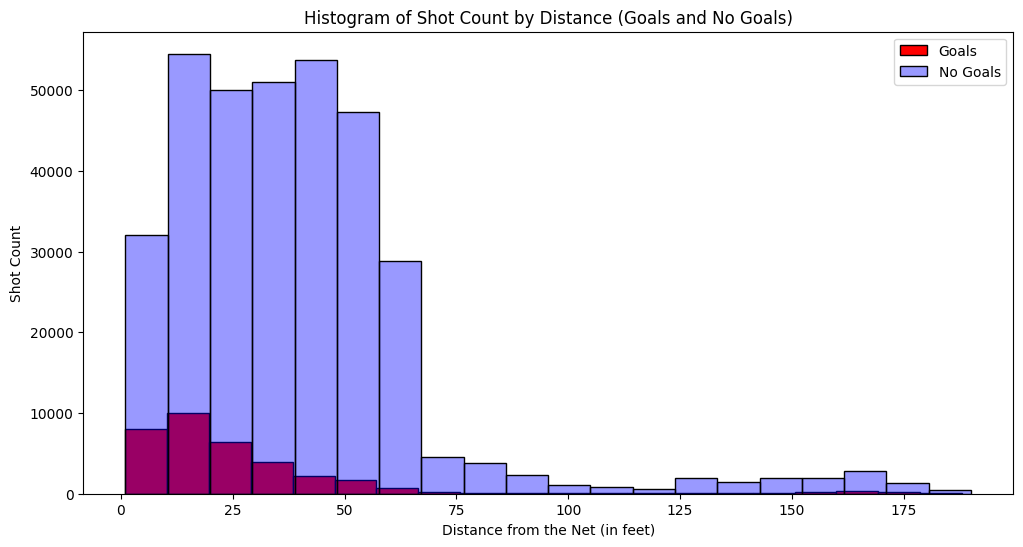

In [6]:
# Separate the DataFrame into two subsets: one for goals and one for no-goals
goals_df = df[df['isGoal'] == 1]
no_goals_df = df[df['isGoal'] == 0]

# Set up the figure
plt.figure(figsize=(12, 6))

# Histogram for goals
sns.histplot(data=goals_df, x='distance_to_goal', bins=20, color='red', label='Goals', alpha=1)

# Histogram for no-goals
sns.histplot(data=no_goals_df, x='distance_to_goal', bins=20, color='blue', label='No Goals', alpha=0.4)

plt.xlabel('Distance from the Net (in feet)')
plt.ylabel('Shot Count')
plt.legend()
plt.title('Histogram of Shot Count by Distance (Goals and No Goals)')

plt.show()

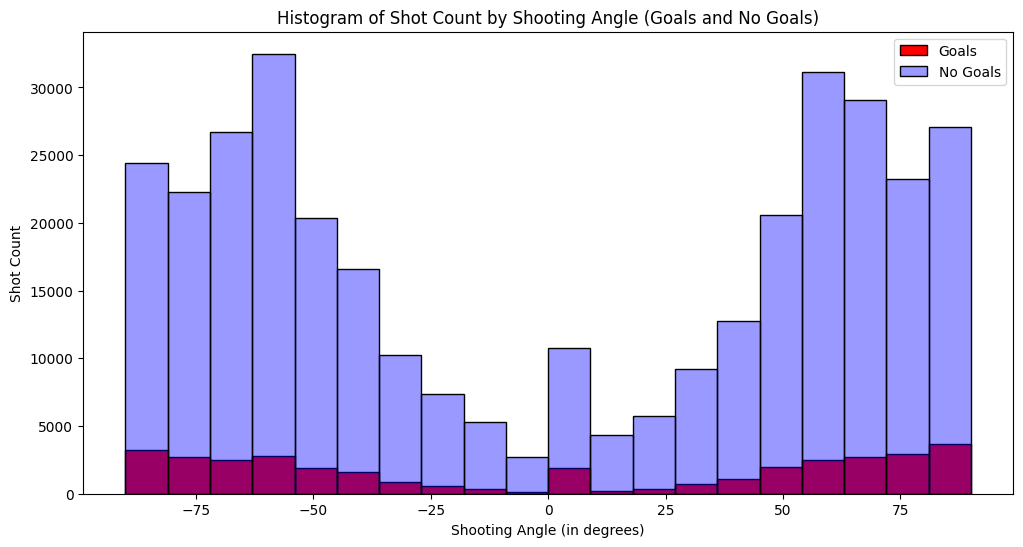

In [7]:
# Separate the DataFrame into two subsets: one for goals and one for no-goals
goals_df = df[df['isGoal'] == 1]
no_goals_df = df[df['isGoal'] == 0]

# Set up the figure
plt.figure(figsize=(12, 6))

# Histogram for goals
sns.histplot(data=goals_df, x='shooting_angle', bins=20, color='red', label='Goals', alpha=1)

# Histogram for no-goals
sns.histplot(data=no_goals_df, x='shooting_angle', bins=20, color='blue', label='No Goals', alpha=0.4)

plt.xlabel('Shooting Angle (in degrees)')
plt.ylabel('Shot Count')
plt.legend()
plt.title('Histogram of Shot Count by Shooting Angle (Goals and No Goals)')

plt.show()

<Figure size 1000x800 with 0 Axes>

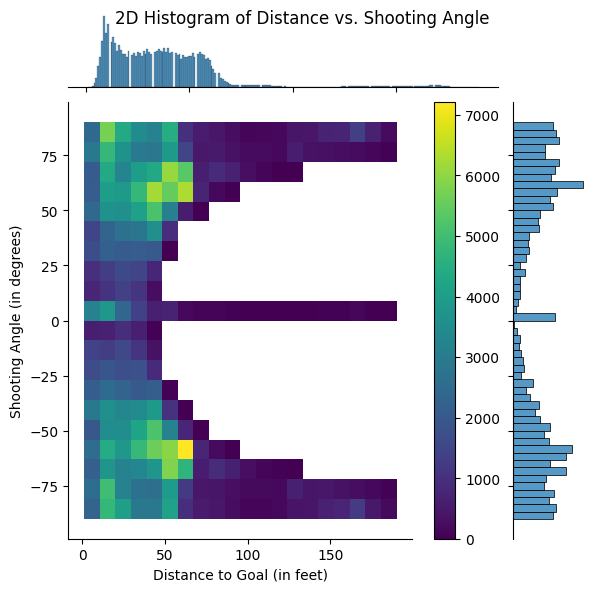

In [18]:
# Set up the figure
plt.figure(figsize=(10, 8))

# Joint plot
sns.jointplot(data=df, x='distance_to_goal', y='shooting_angle', kind='hist', bins=20, cmap='viridis', cbar=True)

plt.xlabel('Distance to Goal (in feet)')
plt.ylabel('Shooting Angle (in degrees)')
plt.suptitle('2D Histogram of Distance vs. Shooting Angle')

plt.show()

In [21]:
# Group the data by distance
distance_grouped = df.groupby('distance_to_goal')

# Calculate the number of goals and no-goals at each distance
goals_count = distance_grouped.size()
no_goals_count = distance_grouped.size().subtract(distance_grouped['isGoal'].sum(), fill_value=0)

# Compute the goal rate (#goals / (#no_goals + #goals))
goal_rate = goals_count / (no_goals_count + goals_count)

# Create a new DataFrame with the distance and goal rate
goal_rate_df = pd.DataFrame({'distance': goal_rate.index, 'goal_rate': goal_rate.values})

# Reset the index for a cleaner DataFrame
goal_rate_df.reset_index(drop=True, inplace=True)

goal_rate_df

,distance,goal_rate
0,1.0,0.800000
1,2.0,0.681159
2,3.0,0.622568
3,4.0,0.596182
4,5.0,0.566387
...,...,...
184,185.0,0.523810
185,186.0,0.528736
186,187.0,0.584906
187,188.0,0.529412


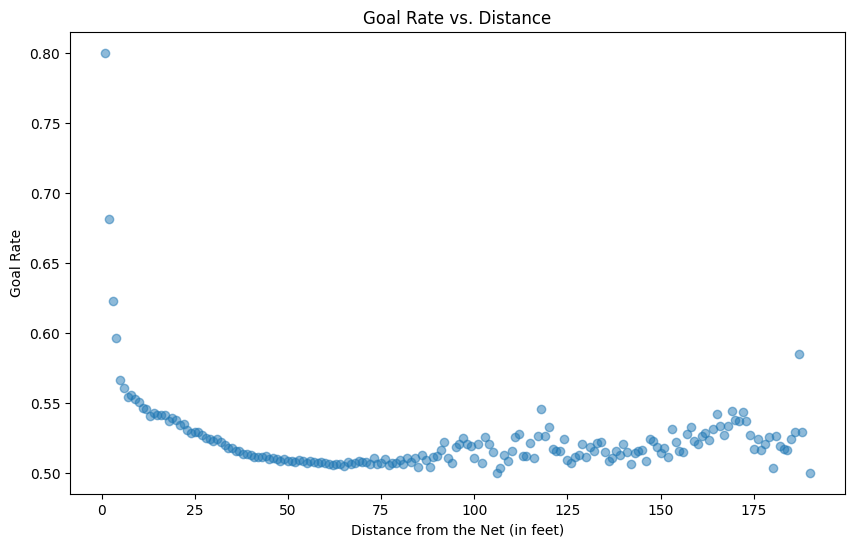

In [23]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(goal_rate_df['distance'], goal_rate_df['goal_rate'], alpha=0.5)
plt.xlabel('Distance from the Net (in feet)')
plt.ylabel('Goal Rate')
plt.title('Goal Rate vs. Distance')
plt.show()

In [24]:
# Group the data by angle
angle_grouped = df.groupby('shooting_angle')

# Calculate the number of goals and no-goals at each angle
goals_count = angle_grouped.size()
no_goals_count = angle_grouped.size().subtract(angle_grouped['isGoal'].sum(), fill_value=0)

# Compute the goal rate (#goals / (#no_goals + #goals))
angle_goal_rate = goals_count / (no_goals_count + goals_count)

# Create a new DataFrame with the distance and goal rate
angle_goal_rate_df = pd.DataFrame({'angle': angle_goal_rate.index, 'goal_rate': angle_goal_rate.values})

# Reset the index for a cleaner DataFrame
angle_goal_rate_df.reset_index(drop=True, inplace=True)

angle_goal_rate_df

,angle,goal_rate
0,-90.0,0.543004
1,-89.0,0.520249
2,-88.0,0.525370
3,-87.0,0.533831
4,-86.0,0.531795
...,...,...
176,86.0,0.532532
177,87.0,0.530344
178,88.0,0.528208
179,89.0,0.521366


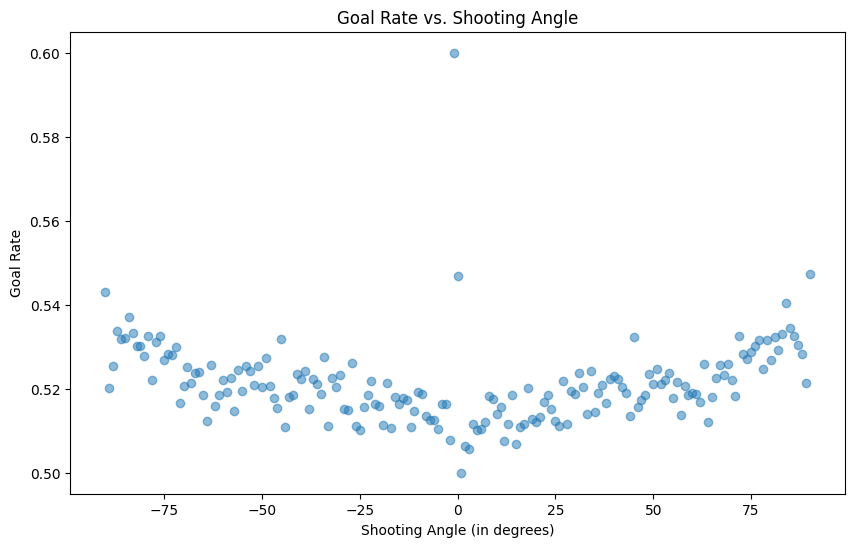

In [25]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(angle_goal_rate_df['angle'], angle_goal_rate_df['goal_rate'], alpha=0.5)
plt.xlabel('Shooting Angle (in degrees)')
plt.ylabel('Goal Rate')
plt.title('Goal Rate vs. Shooting Angle')
plt.show()

isEmptyNet
0    34402
1     1793
Name: count, dtype: int64


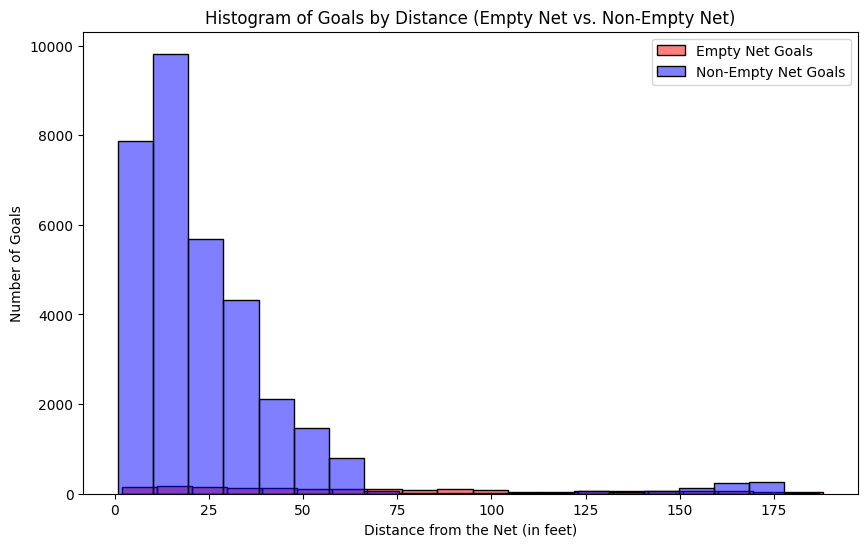

In [29]:
# Filter the DataFrame to include only goals
goal_df = df[df['isGoal'] == 1]

# Create two subsets: empty net goals and non-empty net goals
empty_net_goals = goal_df[goal_df['isEmptyNet'] == 1]
non_empty_net_goals = goal_df[goal_df['isEmptyNet'] == 0]

print(goal_df['isEmptyNet'].value_counts())

plt.figure(figsize=(10, 6))

# Histogram for goals
sns.histplot(empty_net_goals['distance_to_goal'], bins=20, alpha=0.5, label='Empty Net Goals', color='red')

# Histogram for no-goals
sns.histplot(non_empty_net_goals['distance_to_goal'], bins=20, alpha=0.5, label='Non-Empty Net Goals', color='blue')


plt.xlabel('Distance from the Net (in feet)')
plt.ylabel('Number of Goals')
plt.title('Histogram of Goals by Distance (Empty Net vs. Non-Empty Net)')
plt.legend()

plt.show()